In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('sentiment.csv', encoding= 'latin-1')
df.columns
df.head(5)

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [30]:
# feature engineering
df['text'] = df['text'].fillna("").astype(str)
# Features and labels
X = df['text']
y = df['sentiment']

In [31]:
# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y) 
# Convert textual/categorical data into numerical data usinf tfidvectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X_vect = vectorizer.fit_transform(X)

In [32]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_vect, y_encoded, test_size=0.2, random_state=42)
# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [33]:

# Predict and evaluate
y_pred = model.predict(X_test)
# print(classification_report(y_test, y_pred))

In [34]:
comments = pd.read_csv('satest.csv', encoding= 'latin-1')
comments.columns
comments.head(4)

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...


In [35]:
# Enuring no missing values, and all text coverted to strings
comments['tweet'] = comments['tweet'].fillna("").astype(str)
# text transformation using the same vectorizer
x_new = vectorizer.transform(comments['tweet']) 
# x_new.shape

In [36]:
comments['pred_sentis'] = model.predict(x_new)
comments['decoded_sentis'] = label_encoder.inverse_transform(comments['pred_sentis'])

In [37]:
# calculating the percentages
senti_counts = comments['decoded_sentis'].value_counts(normalize=True) * 100
for sentiment,percentage in senti_counts.items():
    print(f"{sentiment} : {percentage:.1f}%")

neutral : 50.0%
positive : 38.1%
negative : 11.9%


Text(0.5, 1.0, 'Sentiment Analysis of Comments')

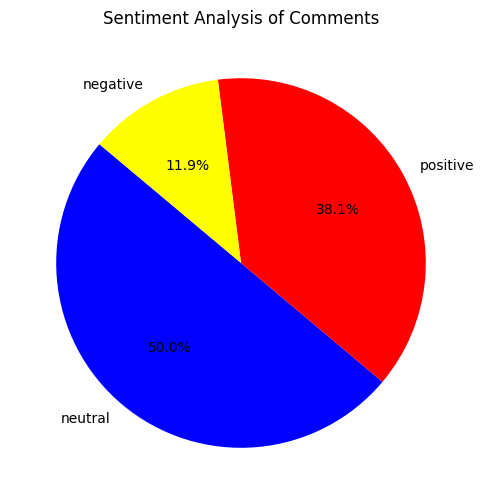

In [38]:
# visualizing using matplotlib
senti_counts = comments['decoded_sentis'].value_counts(normalize = True) * 100

plt.figure(figsize = (8, 6))
colors = ['blue', 'red', 'yellow']
plt.pie(
    senti_counts,
    labels = senti_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors = colors
)
plt.title('Sentiment Analysis of Comments')